In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
from scipy.stats import zscore

In [2]:
full_data_B=pd.read_csv("DataB.csv")

In [3]:
full_data_B

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2062,4,0,3,0,4,0,4,3,1,...,0,1,4,5,4,2,2,2,2,4
2062,2063,2,2,3,4,2,1,2,3,3,...,4,0,1,3,4,0,2,3,2,4
2063,2064,2,3,2,3,1,2,5,5,5,...,5,1,1,2,5,2,1,1,3,4
2064,2065,5,2,4,3,1,0,3,2,2,...,3,2,3,1,4,2,4,3,4,4


In [4]:
features_data_B=full_data_B.filter(regex=("fea.*"))

In [5]:
features_data_B

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,4,0,3,0,4,0,4,3,1,2,...,3,0,1,4,5,4,2,2,2,2
2062,2,2,3,4,2,1,2,3,3,4,...,1,4,0,1,3,4,0,2,3,2
2063,2,3,2,3,1,2,5,5,5,0,...,3,5,1,1,2,5,2,1,1,3
2064,5,2,4,3,1,0,3,2,2,1,...,2,3,2,3,1,4,2,4,3,4


In [6]:
features_data_B_znorm=features_data_B.apply(zscore)

In [7]:
features_data_B_znorm

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1.010077,-1.695492,0.359594,-1.668004,1.011941,-1.662753,1.008426,0.319835,-1.013430,-0.319362,...,0.318686,-1.659949,-1.004957,1.004977,1.687430,1.004104,-0.347950,-0.363590,-0.262071,-0.345379
2062,-0.344121,-0.364355,0.359594,1.004424,-0.313365,-0.995067,-0.324102,0.319835,0.318046,1.005542,...,-1.003413,1.028765,-1.664918,-0.986979,0.364131,1.004104,-1.671828,-0.363590,0.392631,-0.345379
2063,-0.344121,0.301213,-0.307301,0.336317,-0.976018,-0.327380,1.674690,1.632208,1.649523,-1.644266,...,0.318686,1.700943,-1.004957,-0.986979,-0.297518,1.672643,-0.347950,-1.034285,-0.916772,0.319628
2064,1.687176,-0.364355,1.026488,0.336317,-0.976018,-1.662753,0.342162,-0.336351,-0.347692,-0.981814,...,-0.342363,0.356586,-0.344995,0.340991,-0.959168,1.004104,-0.347950,0.977798,0.392631,0.984636


<h2>KPCA</h2>

In [8]:
start = timeit.default_timer()

In [9]:
from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2, kernel='rbf',random_state=42)
k_pca_transformed=k_pca.fit_transform(features_data_B_znorm)

In [10]:
stop = timeit.default_timer()
print('Time KPCA: ', stop - start)

Timetaken = pd.DataFrame(columns = ['Model', 'time'])
Timetaken = Timetaken.append({'Model':'KPCA', 'time':stop-start},ignore_index=True)

Time KPCA:  2.807220315000002


In [11]:
Timetaken

,Model,time
0,KPCA,2.80722


In [12]:
k_pca_transformed_df=pd.DataFrame(k_pca_transformed)

In [13]:
k_pca_transformed_df['gnd']=full_data_B.gnd

In [14]:
k_pca_transformed_df

,0,1,gnd
0,-0.141733,0.157522,0
1,-0.176054,0.096747,0
2,-0.075397,0.147357,0
3,-0.130459,0.173384,0
4,-0.296012,0.041533,0
...,...,...,...
2061,0.074913,0.209512,4
2062,-0.041609,0.093795,4
2063,0.051968,0.246317,4
2064,0.141469,0.157865,4


Text(0.5, 1.0, 'Kernel PCA')

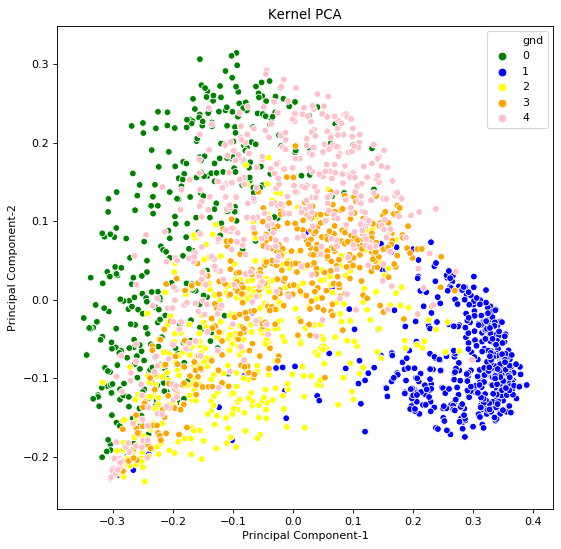

In [15]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=k_pca_transformed_df[0],y=k_pca_transformed_df[1],hue=k_pca_transformed_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.title('Kernel PCA')

<h2>ISOMAP</h2>

In [16]:
start = timeit.default_timer()

In [17]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso_transfer= iso.fit_transform(features_data_B_znorm)

In [18]:
stop = timeit.default_timer()
print('Time ISOMAP: ', stop - start) 

Timetaken = Timetaken.append({'Model':'ISOMAP', 'time':stop-start},ignore_index=True)

Time ISOMAP:  16.555946204


In [19]:
Timetaken

,Model,time
0,KPCA,2.807220
1,ISOMAP,16.555946


In [20]:
iso_transfer_df=pd.DataFrame(iso_transfer)

In [21]:
iso_transfer_df['gnd']=full_data_B.gnd

In [22]:
iso_transfer_df

,0,1,gnd
0,129.766248,-31.203243,0
1,142.147366,-21.099824,0
2,55.245085,-1.532745,0
3,102.802361,-13.649969,0
4,157.263819,-4.914420,0
...,...,...,...
2061,-21.316966,88.201528,4
2062,0.216036,113.891720,4
2063,-17.198930,51.483605,4
2064,-35.585489,52.963544,4


Text(0.5, 1.0, 'Isomap')

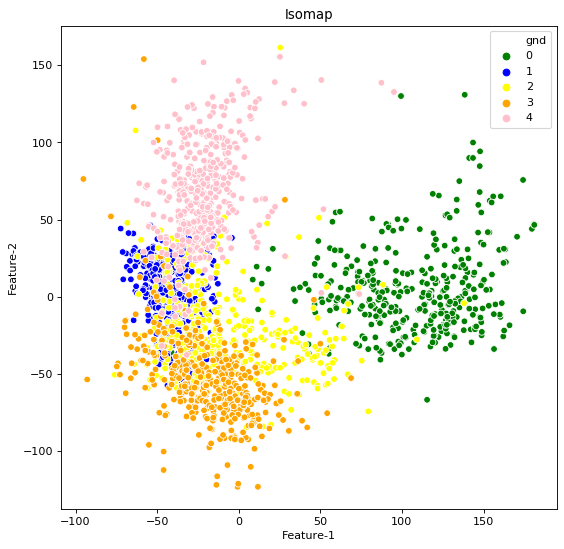

In [23]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=iso_transfer_df[0],y=iso_transfer_df[1],hue=iso_transfer_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Isomap')

<h3>Locally Linear Embedding</h3>

In [24]:
start = timeit.default_timer()

In [25]:
from sklearn.manifold import LocallyLinearEmbedding
lle_embed = LocallyLinearEmbedding(n_components=2,random_state=42)
lle_transformed = lle_embed.fit_transform(features_data_B_znorm)

In [26]:
stop = timeit.default_timer()
print('Time LLE: ', stop - start) 

Timetaken = Timetaken.append({'Model':'LLE', 'time':stop-start},ignore_index=True)

Time LLE:  11.347732464000003


In [27]:
lle_transformed_df=pd.DataFrame(lle_transformed)

In [28]:
lle_transformed_df['gnd']=full_data_B.gnd

In [29]:
lle_transformed_df

,0,1,gnd
0,-0.047242,-0.000739,0
1,-0.046820,-0.000765,0
2,-0.040533,-0.000327,0
3,-0.044592,-0.000642,0
4,-0.047952,-0.000848,0
...,...,...,...
2061,0.012675,-0.053682,4
2062,0.012665,-0.052356,4
2063,0.012522,-0.043606,4
2064,0.012279,-0.031673,4


Text(0.5, 1.0, 'Locally Linear Embedding (LLE)')

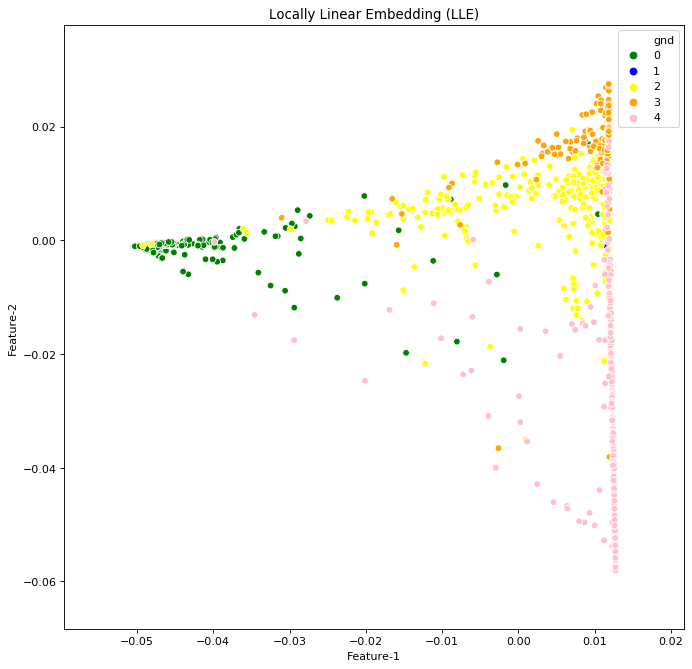

In [30]:
fig=plt.figure(figsize=(10, 10), dpi= 80)
sns.scatterplot(x=lle_transformed_df[0],y=lle_transformed_df[1],hue=lle_transformed_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Locally Linear Embedding (LLE)')

<h3>SPECTRAL EMBEDDING</h3>

In [31]:
start = timeit.default_timer()

In [32]:
from sklearn.manifold import SpectralEmbedding
spec_embed = SpectralEmbedding(n_components=2,random_state=42)
spec_transformed= spec_embed.fit_transform(features_data_B_znorm)

In [33]:
stop = timeit.default_timer()
print('Time Spectral: ', stop - start) 

Timetaken = Timetaken.append({'Model':'SPECTRAL', 'time':stop-start},ignore_index=True)

Time Spectral:  13.08508205599999


In [34]:
spec_transformed_df=pd.DataFrame(spec_transformed)

In [35]:
spec_transformed_df['gnd']=full_data_B.gnd

In [36]:
spec_transformed_df

,0,1,gnd
0,0.003813,-0.000506,0
1,0.003878,-0.000554,0
2,0.001921,-0.000458,0
3,0.002900,-0.000431,0
4,0.004274,-0.000675,0
...,...,...,...
2061,-0.000140,0.003128,4
2062,-0.000341,0.003527,4
2063,-0.000046,0.003117,4
2064,-0.000260,0.002440,4


Text(0.5, 1.0, 'Laplacian Eigenmap')

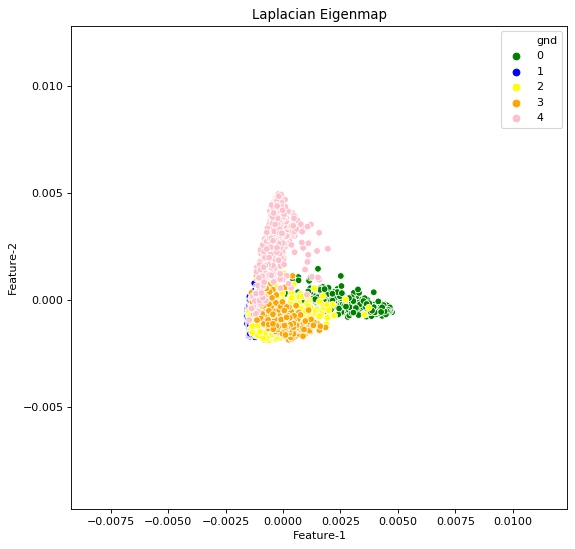

In [37]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=spec_transformed_df[0],y=spec_transformed_df[1],hue=spec_transformed_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Feature-1')
plt .ylabel('Feature-2')
plt.title('Laplacian Eigenmap')

<h3>TSNE</h3>

In [38]:
start = timeit.default_timer()

In [39]:
from sklearn.manifold import TSNE
tsne_embed= TSNE(n_components=2,random_state=42)
tsne_transformed=tsne_embed.fit_transform(features_data_B_znorm)

In [40]:
stop = timeit.default_timer()
print('Time KPCA: ', stop - start) 

Timetaken = Timetaken.append({'Model':'TSNE', 'time':stop-start},ignore_index=True)

Time KPCA:  39.5363964


In [41]:
tsne_transformed_df=pd.DataFrame(tsne_transformed)

In [42]:
tsne_transformed_df['gnd']=full_data_B.gnd

In [43]:
tsne_transformed_df

,0,1,gnd
0,41.532661,-24.378746,0
1,41.793850,-26.211596,0
2,31.790344,-17.388863,0
3,31.795006,-21.673670,0
4,51.994953,-25.928551,0
...,...,...,...
2061,25.351837,53.300770,4
2062,33.663750,39.896450,4
2063,25.643785,33.787823,4
2064,11.307659,34.915760,4


Text(0.5, 1.0, 't-SNE')

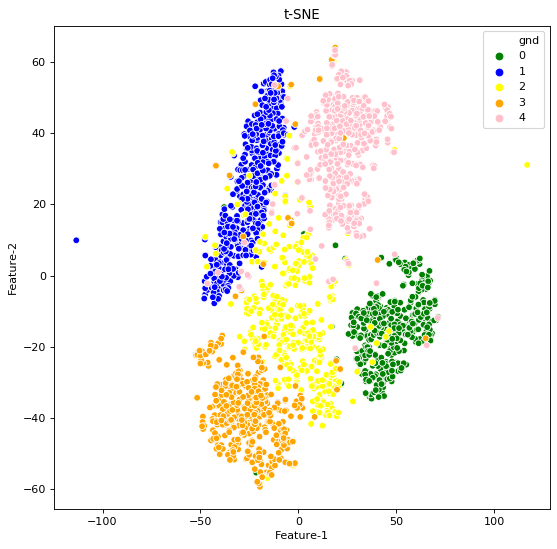

In [44]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=tsne_transformed_df[0],y=tsne_transformed_df[1],hue=tsne_transformed_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('t-SNE')

In [45]:
Timetaken

,Model,time
0,KPCA,2.807220
1,ISOMAP,16.555946
2,LLE,11.347732
3,SPECTRAL,13.085082
4,TSNE,39.536396


<h1>ANALYSIS=></h1>
<p></p>
<h3>1. Methods and Known class comparison:</h3>

<h4>KERNEL PCA</h4>
<p>1.Class 1 is separated by component 1 along the 'x axes' whereas all the other classes are getting overlapped. </p>
<p>2.Component 2 isn't adding much information to the model along the y axes.</p>

<h4>ISOMAP</h4>
<p>1.Class clusters are made by isomap but there is a lot of overlapping between the classes.</p>
<p>2.class [0,4] are separated by both the components.</p>

<h4>LLE</h4>
<p>1.First component separates class [0,2] along the x axes.</p>
<p>2.Second component separates class [3,4] along y axes.</p>
<p>3.Class label 1 is heavily overlapped.</p>
<p>4.Both the components are adding decent information to the model.</p>

<h4>LAPLACIAN EIGENMAP/SPECTRAL EMBEDDING</h4>
<p>1.Variation within the whole data is minimized.</p>
<p>2.Distance between the clusters is also minimized.</p>
<p>3.Local clusters of class [0,1,3,4] are made whereas class label [2] is widely spread.</p>

<h4>t-SNE</h4>
<p>1.All the classes are separated very well by the components.</p>
<p>2.Well defined clusters are made which are separable along the x and y axes.</p>


<h3>PERFORMANCE DIFFERENCES B/W t-SNE AND KERNEL PCA.</h3>

<h4>1.EXECUTION TIME:=></h4>
<p>a)t-SNE takes more execution time than all the other methods as well as much more than KERNEL PCA. time_taken by t-SNE=38.36 seconds.</p>
<p>b)KERNEL PCA takes less time than the t-SNE. In our case, it is 0.77 seconds which is drastically less than t-SNE.</p>
<p>c)In our case, time hardly matters because the dataset is not that big.</p>

<h4>2.SEPARABILITY:=></h4>
<p>a)KERNEL PCA: The variation among all the data provided by the kernel pca is very high whereas no good clustering/separation between the classes can be seen.</p>
<p>b)T-SNE: The variation within the whole data is less than the kernel pca but the clustering is best.</p>

<h4>OVERLAPPED DATAPOINTS:=></h4>
<p>1.kernel pca is overlapping a lot of datapoints of various classes whereas t-SNE segregates the class labels very well.</p>


<h3>TRADEOFF:=></h3>

<h4>Execution Time:</h4>
<p>There is no need to consider the execution time in our dataset to find out the best method as the time taken by all the methods is in seconds as the dataset is not too large.</p>

<h4>Separability:</h4>
<p>The variation of data within the class and the variation of data between the classes is required to be considered in our method to properly classify the datapoints when any classification technique is applied. It can be clearly seen that t-SNE satisfies both of these tradeoffs providing the best clustering/local clusters for all the datapoints.</p>






<h6>Citations:</h6>
<p>1.https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/</p>
<p>2.https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/</p>
<p>3.https://distill.pub/2016/misread-tsne/</p>